In [15]:
# Importando as bibliotecas necessárias
import pandas as pd

# Carregar o arquivo CSV
df = pd.read_csv('https://raw.githubusercontent.com/Im-not-a-Flamme/Project_IA__FIAPCP1/main/urls_phishing_checkpoint1.csv')

# Dividir o DataFrame em dois subconjuntos
# 1 indica phishing e 0 indica legítima
df_phishing = df[df['phishing'] == 1]
df_legit = df[df['phishing'] == 0]

# Definir a semente para amostragem
random_state = 7

# Selecionar uma amostra de 4000 observações
sample_phishing = df_phishing.sample(n=2000, random_state=random_state)
sample_legit = df_legit.sample(n=2000, random_state=random_state)

# Concatenar as duas amostras
sample_df = pd.concat([sample_phishing, sample_legit])

# Exibir as primeiras linhas da amostra
sample_df.head()


,urls,phishing,domain,ip,at,length_url,depth_url,double_slash,http_https,shortening_services,hyphen,dns,age_domain,end_period_domain,country
5,https://ipfs.io/ipfs/bafybeigz2nfvvj37pr5ou563...,1,ipfs.io,1,0,80,2,0,0,0,0,1,10.0,2025-05,Mexico
2481,https://spk-freigabe.info/online/sparkasse/con...,1,spk-freigabe.info,1,0,57,4,0,0,0,1,1,0.0,2025-07,China
3165,https://securecomnityveri.boxmode.io/,1,securecomnityveri.boxmode.io,1,0,37,1,0,0,0,0,1,5.0,2025-07,Spain
1749,https://usps.postupdates.top/,1,usps.postupdates.top,1,0,29,1,0,0,0,0,1,0.0,2025-07,Brazil
3259,https://tinyurl.com/2k2rmdu7,1,tinyurl.com,1,0,28,1,0,0,1,0,1,22.0,2029-01,China


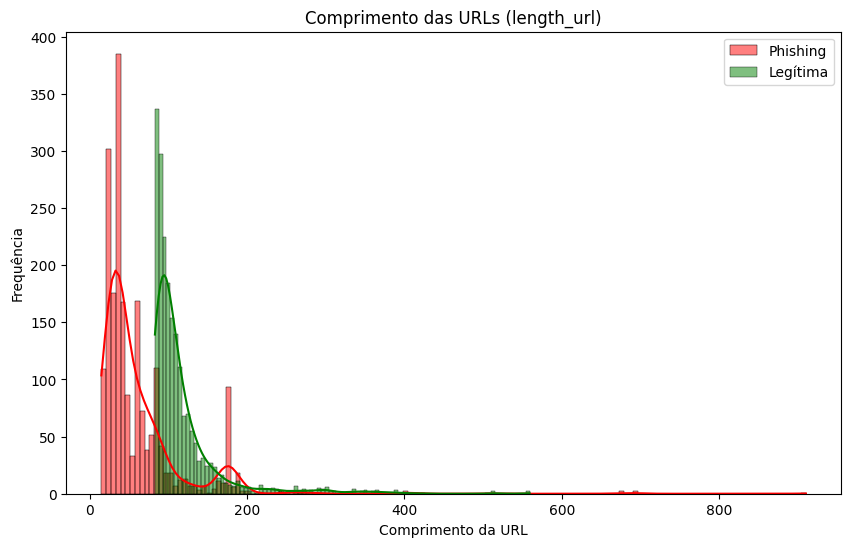

Phishing URLs
count    2000.000000
mean       60.991500
std        59.004366
min        15.000000
25%        30.750000
50%        40.000000
75%        69.250000
max       910.000000
Name: length_url, dtype: float64

Legitimate URLs
count    2000.000000
mean      116.720000
std        49.940972
min        83.000000
25%        90.000000
50%       101.000000
75%       121.000000
max       559.000000
Name: length_url, dtype: float64


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Analisando a variável "length_url" para URLs de phishing
plt.figure(figsize=(10, 6))
sns.histplot(sample_phishing['length_url'], kde=True, color='red', label='Phishing')
sns.histplot(sample_legit['length_url'], kde=True, color='green', label='Legítima')
plt.title('Comprimento das URLs (length_url)')
plt.xlabel('Comprimento da URL')
plt.ylabel('Frequência')
plt.legend()
plt.show()

# Exibir estatísticas descritivas da variável "depth_url" para ambos os subconjuntos
print("Phishing URLs")
print(sample_phishing['length_url'].describe())
print("\nLegitimate URLs")
print(sample_legit['length_url'].describe())


In [12]:
# Carregar o arquivo não rotulado
df_not_label = pd.read_csv('https://raw.githubusercontent.com/Im-not-a-Flamme/Project_IA__FIAPCP1/main/urls_phishing_checkpoint1_not_label.csv')

# Contar a frequência de domínios no dataset
domain_counts = df_not_label['domain'].value_counts()

# Exibir os domínios com maior frequência
print(domain_counts.head(10))

domain
almardoof.com                                                                       1
bafybeicw5n36ionzo7ijatn32v2vwpyhsxm5wpmq2wcppwbohfmymdlu3y.ipfs.nftstorage.link    1
fazenda.gov.br                                                                      1
distractify.com                                                                     1
mylust.com                                                                          1
docs.google.com                                                                     1
campsite.bio                                                                        1
transxkvv.world                                                                     1
matemcskilpogin.gitbook.io                                                          1
utadc.com                                                                           1
Name: count, dtype: int64


In [14]:
# Calcular a profundidade média das URLs de phishing e legítimas
mean_lenght_phishing = sample_phishing['length_url'].mean()
mean_lenght_legit = sample_legit['length_url'].mean()

# Função para prever se uma URL é phishing com base no comprimento
def predict_phishing(length_url):
  if length_url > (mean_lenght_phishing + mean_lenght_legit) / 2:
    return 1  # Phishing
  else:
    return 0  # Legítima

# Aplicar a função de previsão ao dataset não rotulado
df_not_label['prediction'] = df_not_label['length_url'].apply(predict_phishing)

# Agrupar por domínio e calcular a precisão da previsão
domain_predictions = df_not_label.groupby('domain')['prediction'].agg(['sum', 'count'])
domain_predictions['accuracy'] = domain_predictions['sum'] / domain_predictions['count']

# Filtrar os domínios com 80% ou mais de precisão
high_accuracy_domains = domain_predictions[domain_predictions['accuracy'] >= 0.8]

# Exibir os domínios com alta precisão
print(high_accuracy_domains)

                                                    sum  count  accuracy
domain                                                                  
akhbarelyom.com                                       1      1       1.0
bafybeicw5n36ionzo7ijatn32v2vwpyhsxm5wpmq2wcppw...    1      1       1.0
bdnews24.com                                          1      1       1.0
deadspin.com                                          1      1       1.0
docs.google.com                                       1      1       1.0
extratorrent.cc                                       1      1       1.0
fazenda.gov.br                                        1      1       1.0
olx.ro                                                1      1       1.0
torcache.net                                          1      1       1.0
twitter.com                                           1      1       1.0
